<centeR><h1><strong>ASSIGNMENT#1</h1></strong></center>

Name:Muhammad Ahmed Javed 

Roll Number:L21-7692

---
  
<centeR><h1><strong>Setup & Libraries</h1></strong></center>

In [1]:
!pip install lxml selenium  plotly 

In [56]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import numpy as np
import requests
from requests import get
import lxml.html
from time import sleep
from random import randint
import time
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.express as px
from bs4 import BeautifulSoup
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException, ElementNotInteractableException
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from lxml import etree
global driver
driver = webdriver.Chrome(ChromeDriverManager().install())

<centeR><h1><strong>Question 1: Data Scraping</h1></strong></center>
<h3>Part 1: Selenium</h3>

You are provided with the URL of a YouTube channel. Your task is to write Python code using
Selenium to scrape to extract relevant information and gain insights from the collected data.

In [57]:
URL_P1 = 'https://www.youtube.com/@UnfoldDataScience/videos'

In [58]:
def scroll_down(scrolls, halfpage=False, sleep=0):
    while scrolls > 0:
        if halfpage:
            driver.find_element('tag name', 'body').send_keys(Keys.PAGE_DOWN)
        else:
            driver.find_element('tag name', 'body').send_keys(Keys.END)
        scrolls -= 1
        if sleep > 0:
            time.sleep(3)

In [69]:
def GetVidData(URL):
    driver.get(URL)
    time.sleep(1)
    scroll_down(1, sleep=3, halfpage=True)
    N = driver.find_elements(By.XPATH, '//*[@id="title"]/h1/yt-formatted-string')
    L = driver.find_elements(By.XPATH, '//*[@id="segmented-like-button"]/ytd-toggle-button-renderer/yt-button-shape/button/div[2]/span')
    D_element = driver.find_element(By.XPATH, '//*[@id="info"]/span[3]')
    D_element.click()
    D_text = D_element.text
    comments = driver.find_elements(By.XPATH, '//*[@id="count"]/yt-formatted-string/span[1]')
    V  = driver.find_elements(By.XPATH, '//*[@id="info"]/span[1]') 
    return N,V,L,D_text,comments

In [101]:
likes = []
views=[]
dates = []
names = []
comments = []

In [ ]:
URL_P1 = 'https://www.youtube.com/@UnfoldDataScience/videos'
driver.get(URL_P1)
time.sleep(5)
scroll_down(15, sleep=3, halfpage=False)
video_link = driver.find_elements(By.XPATH, '//*[@id="video-title-link"]')
video_links = [link.get_attribute('href') for link in video_link]
for link in video_links:
    name, view, like, date, comment= GetVidData(link)
    if date!="Sep 10,2019":
        if name:
            names.append(name[0].text)
        else:
            names.append("N/A")
        if view:
            views.append(view[0].text)
        else:
            views.append("N/A")
        if like:
            likes.append(like[0].text)
        else:
            likes.append("N/A")
        if date:
            dates.append(date)
        else:
            dates.append("N/A")
        if comments:
            comments.append(comment[0].text)
        else:
            comments.append("N/A")
driver.close()
data = pd.DataFrame({'TITLE': video_names,'VIEWS': video_views,'DATE': video_dates,'LIKE': video_likes,'COMMENT': video_comments
}).to_csv('YOUTUBE_CHANNEL_DATASET.csv', index=False)

In [ ]:
data = pd.read_csv('YOUTUBE_CHANNEL_DATASET.csv')
def average_views_last_30_days(data):
    data['DATE'] = pd.to_datetime(data['DATE'])
    current_date = pd.Timestamp.now()
    date_30_days_ago = current_date - pd.DateOffset(days=30)
    recent_videos = data[data['DATE'] >= date_30_days_ago]
    average_views = recent_videos['VIEW'].str.replace('K', '').astype(float).mean()
    return average_views
def highest_likes_to_views_ratio(data):
    data['LIKE'] = data['LIKE'].str.replace('K', '').astype(float)
    data['VIEW'] = data['VIEW'].str.replace('K', '').astype(float)
    data['LIKES_TO_VIEWS_RATIO'] = data['LIKE'] / data['VIEW']
    highest_ratio_video = data.loc[data['LIKES_TO_VIEWS_RATIO'].idxmax()]
    return highest_ratio_video
def likes_comments_correlation(data):
    data['LIKE'] = data['LIKE'].str.replace('K', '').astype(float)
    data['COMMENT'] = data['COMMENT'].str.replace('K', '').astype(float)
    correlation = data['LIKE'].corr(data['COMMENT'])
    return correlation
def most_common_upload_day(data):
    data['DATE'] = pd.to_datetime(data['DATE'])
    common_day = data['DATE'].dt.day_name().mode()[0]
    return common_day
def detect_view_outliers(data):
    data['VIEWS'] = data['VIEWS'].str.replace('K', '').astype(float)
    Q1 = data['VIEWS'].quantile(0.25)
    Q3 = data['VIEWS'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data['VIEWS'] < lower_bound) | (data['VIEWS'] > upper_bound)]    
    return outliers
average_views = average_views_last_30_days(data)
highest_ratio_video = highest_likes_to_views_ratio(data)
correlation = likes_comments_correlation(data)
common_day = most_common_upload_day(data)
outliers = detect_view_outliers(data)


<center><h1><strong>Question 1: Data Scraping
Part 2: Beautiful Soup</h1></strong></center>

---

In [98]:
titles=[]
years=[]
directors=[]
genres=[]
imdb_ratings=[]
pages=np.arange(1, 1001, 50)
pages

array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])

In [99]:
def SCRAP_IMDb_DATA():
    try:
        for page_number in pages:
            url = f'https://www.imdb.com/search/title/?groups=top_1000&start={page_number}&ref_=adv_nxt'
            response=requests.get(url)
            soup =BeautifulSoup(response.content, 'html.parser')
            movie_div= soup.find_all('div', class_='lister-item mode-advanced')
            for container in movie_div:
                name =container.h3.a.text
                year_text= container.h3.find('span', class_='lister-item-year').text
                year_match= re.search(r'\d{4}', year_text)
                release_year=int(year_match.group()) if year_match else None
                if release_year and 2013 <= release_year <=2023:
                    imdb = float(container.strong.text)
                    genre_element =container.find('span', class_='genre')
                    genre = genre_element.text.strip()
                    director_element= container.find_all('p', class_='')
                    if director_element:
                        for element in director_element:
                            text_d=element.get_text()
                            director_name=text_d.replace("Director:", "").strip()
                            director_name= director_name.split('|')[0].strip()
                            cleaned_director=director_name.replace("Directors:","").strip()
                            directors.append(cleaned_director)
                    titles.append(name)
                    years.append(year_text)
                    imdb_ratings.append(imdb)
                    genres.append(genre)
                    """print(name, "|", year_text, "|", imdb, "|", genre, "|",cleaned_director)
                    print("---------------------------------------------------------")"""#output is too large                   
    except Exception as e:
        print(f"An error occurred in Scraping IMDb DATA: {str(e)}")

In [100]:
def main():
    SCRAP_IMDb_DATA()
    data_frame=pd.DataFrame({"MOVIE NAME":titles,"YEAR":years,"RATING":imdb_ratings,"GENRE":genres,"DIRECTOR":directors})
    data_frame.to_csv("IMDb_MOVIE_DATA.csv",index=False)
if __name__=='__main__':
    main()

● Create functions for
each of the tasks listed below:

⮚ Average IMDb rating for the top-rated movies.

⮚ The most common genre among the top-rated movies.

⮚ Identify the director with the highest average IMDb rating.

⮚ Determine the year with the highest number of top-rated movies.

In [101]:
file=pd.read_csv("IMDb_MOVIE_DATA.csv")
file.head()

MOVIE NAME    YEAR  RATING  \
0                                    Oppenheimer  (2023)     8.6   
1            Spider-Man: Across the Spider-Verse  (2023)     8.7   
2                 Guardians of the Galaxy Vol. 3  (2023)     7.9   
3  Mission: Impossible - Dead Reckoning Part One  (2023)     7.9   
4                                     The Batman  (2022)     7.8   

                          GENRE  \
0     Biography, Drama, History   
1  Animation, Action, Adventure   
2     Action, Adventure, Comedy   
3   Action, Adventure, Thriller   
4          Action, Crime, Drama   

                                            DIRECTOR  
0                                  Christopher Nolan  
1  Joaquim Dos Santos, \nKemp Powers, \nJustin K....  
2                                         James Gunn  
3                              Christopher McQuarrie  
4                                        Matt Reeves

In [107]:
def calculate_average_rating(data_frame):
    ratings = pd.to_numeric(data_frame['RATING'])
    average_rating = ratings.mean()
    return average_rating
print(f"Average of IMDb Movies Rating:{calculate_average_rating(file):.2f}")

Average of IMDb Movies Rating:7.98


In [122]:
def common_genre(data_frame):
    genre_type= data_frame['GENRE'].str.split(',').explode().value_counts().index[0]
    return genre_type
print(f"The Most Common Genre Among the top-rated movies is:{common_genre(file)}")

The Most Common Genre Among the top-rated movies is: Drama


In [127]:
def director_with_highest_average_rating(data_frame):
    director_ratings = data_frame[['DIRECTOR', 'RATING']].copy()
    director_ratings['RATING'] = pd.to_numeric(director_ratings['RATING'], errors='coerce')
    director_average_ratings = director_ratings.groupby('DIRECTOR')['RATING'].mean()
    highest_rated_director = director_average_ratings.idxmax()
    return highest_rated_director
print(f"The Director With Higest Average Rating:{director_with_highest_average_rating(file)}")

The Director With Higest Average Rating:Kiranraj K


In [140]:
def year_with_highest_number_of_movies(data_frame, top=5):
    years = data_frame['YEAR']
    year_counts = years.value_counts()
    highest_rated_year = year_counts.idxmax()
    year_movies = data_frame[data_frame['YEAR'] == highest_rated_year]  # Use highest_rated_year here
    year_movies = year_movies.sort_values(by='RATING', ascending=False)
    top_n_movies = year_movies.head(top)
    return highest_rated_year, top_n_movies
highest_rated_year, top_3_movies = year_with_highest_number_of_movies(file, 3)
print(f"Year with the highest number of top-rated movies: {highest_rated_year},{top_3_movies}")

Year with the highest number of top-rated movies: (2014),      MOVIE NAME    YEAR  RATING                     GENRE           DIRECTOR
6   Interstellar  (2014)     8.7  Adventure, Drama, Sci-Fi  Christopher Nolan
31      Whiplash  (2014)     8.5              Drama, Music    Damien Chazelle
19     Gone Girl  (2014)     8.1  Drama, Mystery, Thriller      David Fincher


<center><h1><strong>Question 2: Data Wrangling</h1></strong></center>

---

<center><h4>Load the dataset into a Pandas dataframe and display the first few rows.</h4></center>


In [72]:
file=pd.read_csv("House_Pricing.csv")
file.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

<center><h4>Checking Nan Values</h4></center>


In [73]:
file.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<center><h4>Checking Column Names</h4></center>


In [74]:
file.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

<center><h4>Checking Shape </h4></center>


In [75]:
file.shape

(506, 14)

<center><h4>Checking Columns Data Type</h4></center>


In [76]:
file.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

<center><h4>"age" should be of 10,20,...,100 as integer data type</center></h4>


In [77]:
#age should be of 10,20,...,100 as integer data type
file['age'] = file['age'].round().astype(int)
file.head()#as you can see "age" in converted intp int data type.

crim    zn  indus  chas    nox     rm  age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   79  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   46  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

<center><h4>Summary of Dataset</h4></center>

In [78]:
file.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.559289    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.147164    2.105710    8.707259  168.537116    2.164946   91.294864   
min      3.000000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.000000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.000000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<center><h4>Discretize the "age" variable into three bins: 'Young', 'Middle-aged', and 'Old':</center></h4>

In [79]:
LABELS= ['Young', 'Middle-aged','Old']
BINS=[0, 40, 70, float('inf')] 
file['age_bins'] = pd.cut(file['age'], bins=BINS, labels=LABELS)
file.head()

crim    zn  indus  chas    nox     rm  age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   79  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   46  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54  6.0622    3  222     18.7   

        b  lstat  medv     age_bins  
0  396.90   4.98  24.0  Middle-aged  
1  396.90   9.14  21.6          Old  
2  392.83   4.03  34.7  Middle-aged  
3  394.63   2.94  33.4  Middle-aged  
4  396.90   5.33  36.2  Middle-aged

In [80]:
file[file['age']==100].head()#just to check all rows having 100 age labeled with age_bins of "Old"

crim    zn  indus  chas    nox     rm  age     dis  rad  tax  ptratio  \
8    0.21124  12.5   7.87     0  0.524  5.631  100  6.0821    5  311     15.2   
23   0.98843   0.0   8.14     0  0.538  5.813  100  4.0952    4  307     21.0   
31   1.35472   0.0   8.14     0  0.538  6.072  100  4.1750    4  307     21.0   
141  1.62864   0.0  21.89     0  0.624  5.019  100  1.4394    4  437     21.2   
142  3.32105   0.0  19.58     1  0.871  5.403  100  1.3216    5  403     14.7   

          b  lstat  medv age_bins  
8    386.63  29.93  16.5      Old  
23   394.54  19.88  14.5      Old  
31   376.73  13.04  14.5      Old  
141  396.90  34.41  14.4      Old  
142  396.90  26.82  13.4      Old

<center><h4>Create a binary variable "is_charles_river" based on the "chas" column.</h4></center>

In [81]:
file['is_charles_river']=(file['chas'] == 1).astype(int)#using "astype(int)" to make values "1" isntead of "True"
file[file['is_charles_river']==1].head()#just to check all 5 rows having "1" chas labeled 

crim   zn  indus  chas    nox     rm  age     dis  rad  tax  ptratio  \
142  3.32105  0.0  19.58     1  0.871  5.403  100  1.3216    5  403     14.7   
152  1.12658  0.0  19.58     1  0.871  5.012   88  1.6102    5  403     14.7   
154  1.41385  0.0  19.58     1  0.871  6.129   96  1.7494    5  403     14.7   
155  3.53501  0.0  19.58     1  0.871  6.152   83  1.7455    5  403     14.7   
160  1.27346  0.0  19.58     1  0.605  6.250   93  1.7984    5  403     14.7   

          b  lstat  medv age_bins  is_charles_river  
142  396.90  26.82  13.4      Old                 1  
152  343.28  12.12  15.3      Old                 1  
154  321.02  15.12  17.0      Old                 1  
155   88.01  15.02  15.6      Old                 1  
160  338.92   5.50  27.0      Old                 1

<center><h4>Detect and remove outliers for each numerical column in the dataset using the
    Interquartile Range (IQR) method. (Don't use any in-built library for this part.)</h4></center>

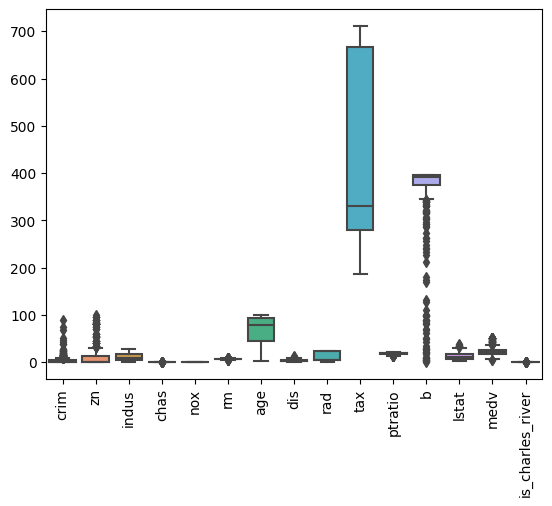

In [82]:
sns.boxplot(data=file)
plt.xticks(rotation=90)
plt.show()

In [83]:
def detect_outliers_custom(column):
    sorted_column = sorted(column)
    q1 = sorted_column[int(0.25 * len(sorted_column))]
    q3 = sorted_column[int(0.75 * len(sorted_column))]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = []
    for x in column:
        if x < lower_bound or x > upper_bound:
            outliers.append(x)
    return outliers

In [84]:
numerical_columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv', 'is_charles_river']
outliers_dict = {}

In [85]:
columns_having_outliers=[]
for col in numerical_columns:
    outliers_dict[col] = detect_outliers_custom(file[col])
for col, outliers in outliers_dict.items():
    if len(outliers) > 0:
        print(f"Outliers in column '{col}': {sum(outliers):.2f}")

Outliers in column 'crim': 1301.17
Outliers in column 'zn': 4351.50
Outliers in column 'chas': 35.00
Outliers in column 'rm': 213.02
Outliers in column 'dis': 54.72
Outliers in column 'ptratio': 193.80
Outliers in column 'b': 13378.26
Outliers in column 'lstat': 212.52
Outliers in column 'medv': 1699.50
Outliers in column 'is_charles_river': 35.00


In [86]:
def remove_outliers(df, column):
    sorted_column=sorted(df[column])
    q1=sorted_column[int(0.25* len(sorted_column))]
    q3=sorted_column[int(0.75 * len(sorted_column))]
    iqr=q3-q1
    lower_bound =q1 - 1.5 *iqr
    upper_bound = q3 + 1.5* iqr
    filtered_df= df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
    return filtered_df

In [87]:
columns_having_outliers=['crim','zn','chas','rm','dis','ptratio','b','lstat','medv','is_charles_river']
print("Original DataFrame shape:", file.shape)
for col in numerical_columns:
    file = remove_outliers(file, col)
print("Filtered DataFrame shape:", file.shape)

Original DataFrame shape: (506, 16)
Filtered DataFrame shape: (216, 16)


<center><h4>Identify and remove noisy data points from the dataset.</h4></center>

In [88]:
z_scores=np.abs(stats.zscore(file.select_dtypes(include=['int','float'])))
threshold=3
noisy_rows=np.any(z_scores>threshold,axis=1)
cleaned_file=file[~noisy_rows]
file=cleaned_file.copy()

In [89]:
file.shape

(201, 16)

<center><h4>Apply smoothing to the "rm" column and create a new smoothed column.</h4></center>

In [90]:
window_size=3
file['rm_smoothed']=file['rm'].rolling(window=window_size,min_periods=1).mean()
file.head()

crim    zn  indus  chas    nox     rm  age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   79  4.9671    2  242     17.8   
5  0.02985   0.0   2.18     0  0.458  6.430   59  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   67  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96  5.9505    5  311     15.2   

        b  lstat  medv     age_bins  is_charles_river  rm_smoothed  
0  396.90   4.98  24.0  Middle-aged                 0     6.575000  
1  396.90   9.14  21.6          Old                 0     6.498000  
5  394.12   5.21  28.7  Middle-aged                 0     6.475333  
6  395.60  12.43  22.9  Middle-aged                 0     6.287667  
7  396.90  19.15  27.1          Old                 0     6.204667

<center><h4>Normalize the "tax" and "lstat" columns using Min-Max normalization.</h4></center>

In [91]:
columns_to_normalize=['tax','lstat']
def min_max_norm(column):
    min_v=column.min()
    max_v=column.max()
    return (column-min_v)/(max_v-min_v)

In [92]:
file[columns_to_normalize]=file[columns_to_normalize].apply(min_max_norm)
file.head()
#now you can see that "tax" and "Istat" ranges between 0 and 1.

crim    zn  indus  chas    nox     rm  age     dis  rad       tax  \
0  0.00632  18.0   2.31     0  0.538  6.575   65  4.0900    1  0.422131   
1  0.02731   0.0   7.07     0  0.469  6.421   79  4.9671    2  0.200820   
5  0.02985   0.0   2.18     0  0.458  6.430   59  6.0622    3  0.118852   
6  0.08829  12.5   7.87     0  0.524  6.012   67  5.5605    5  0.483607   
7  0.14455  12.5   7.87     0  0.524  6.172   96  5.9505    5  0.483607   

   ptratio       b     lstat  medv     age_bins  is_charles_river  rm_smoothed  
0     15.3  396.90  0.109051  24.0  Middle-aged                 0     6.575000  
1     17.8  396.90  0.335878  21.6          Old                 0     6.498000  
5     18.7  394.12  0.121592  28.7  Middle-aged                 0     6.475333  
6     15.2  395.60  0.515267  22.9  Middle-aged                 0     6.287667  
7     15.2  396.90  0.881679  27.1          Old                 0     6.204667

<center><h4>Perform a simple linear regression to predict the median value of "medv" based on the
"rm" variable.</h4></center>

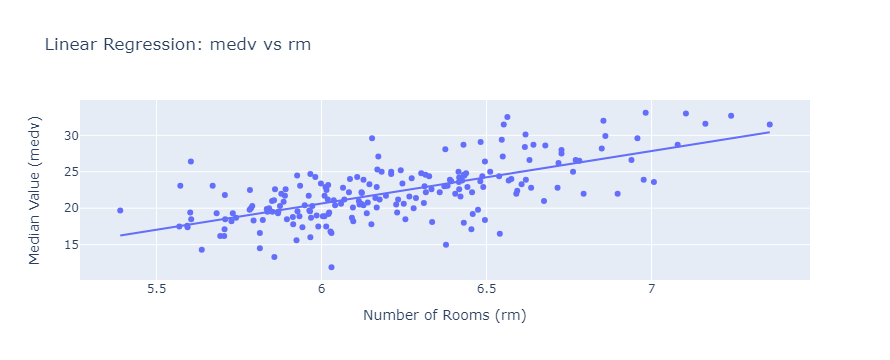

In [94]:
X=file[['rm']]
Y=file.medv  
model=LinearRegression()
model.fit(X,Y)
predictions = model.predict(X)
scatter_data = pd.DataFrame({'Number of Rooms (rm)': X['rm'], 'Median Value (medv)': Y, 'Predictions': predictions})
fig = px.scatter(scatter_data, x='Number of Rooms (rm)', y='Median Value (medv)', labels={'Number of Rooms (rm)': 'Number of Rooms (rm)', 'Median Value (medv)': 'Median Value (medv)'}, title='Linear Regression: medv vs rm')
fig.add_trace(px.line(scatter_data, x='Number of Rooms (rm)', y='Predictions', line_shape='linear').data[0])
fig.show()